In [1]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
x = np.array([[1,2], [1,4], [1,0],
            [4,2], [4,4], [4,0]])
clustering = AgglomerativeClustering(n_clusters=2).fit(x)
print(clustering.labels_)

[1 1 1 0 0 0]


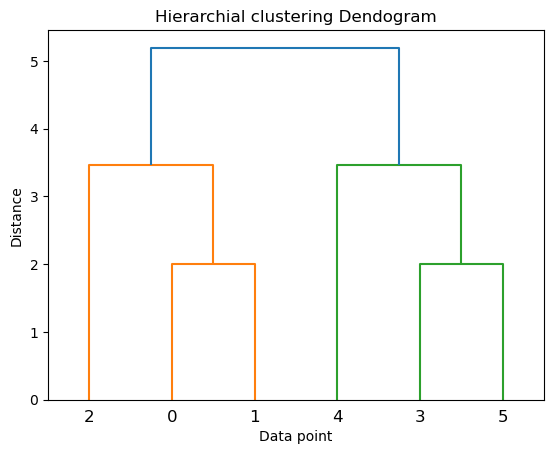

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage 
import numpy as np
import matplotlib.pyplot as plt
x = np.array([[1,2], [1,4], [1,0],
            [4,2], [4,4], [4,0]])
z = linkage(x,'ward')
dendrogram(z)
plt.title("Hierarchial clustering Dendogram")
plt.xlabel("Data point")
plt.ylabel("Distance")
plt.show()

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset (tab-separated data in a single column)
data = pd.read_csv("marketing_campaign1.csv")
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [20]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [21]:
# Summary of numerical columns
print("\nSummary Statistics:\n", data.describe())

# Summary of categorical columns
print("\nCategorical Column Counts:\n", data.select_dtypes(include=['object']).nunique())



Summary Statistics:
                  ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0

In [22]:
print("Actual columns in dataset:")
print(data.columns.tolist())


Actual columns in dataset:
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [23]:
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
                  'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                  'MntGoldProds', 'NumDealsPurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 
                  'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 
                  'Z_CostContact', 'Z_Revenue']

# Step 2: Handle missing values (fill NaN values with column mean)
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Step 3: Scale the data using StandardScaler
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numerical_cols] = scaler.fit_transform(data[numerical_cols])


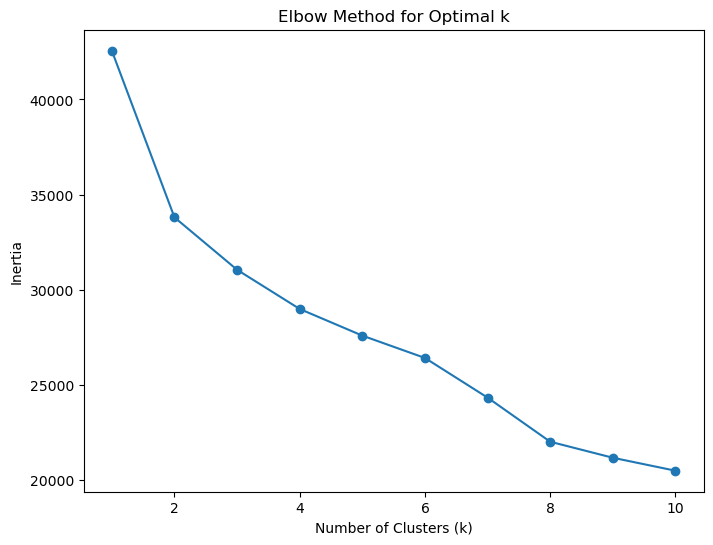

     ID  Cluster
0  5524        2
1  2174        3
2  4141        2
3  6182        0
4  5324        0


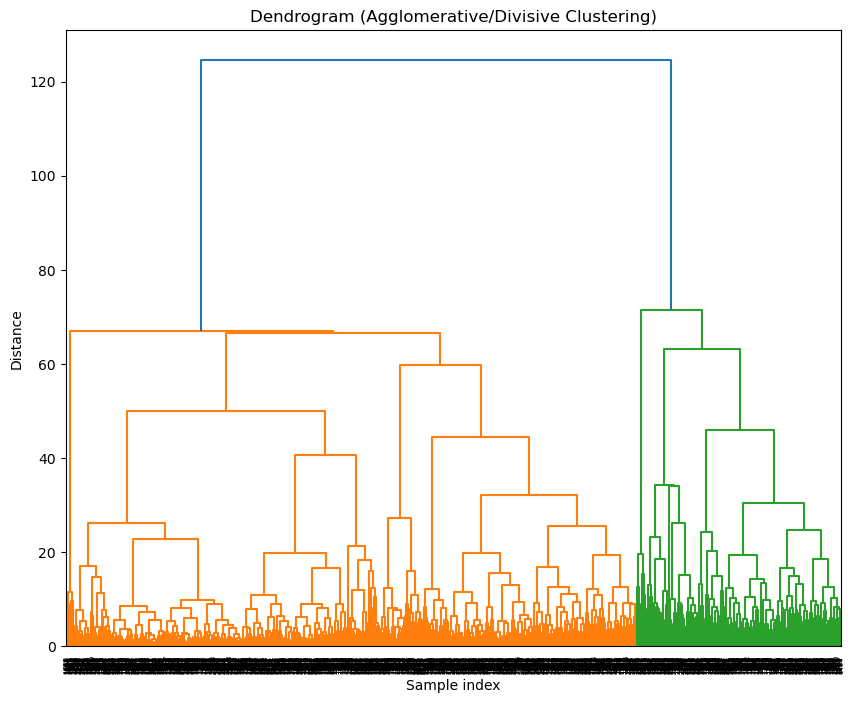

In [24]:
# Step 4: Find the optimal number of clusters using the elbow method
inertia = []  # List to store inertia values for each k
K_range = range(1, 11)  # Testing k values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled[numerical_cols])
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
# Step 5: Fit K-Means with the chosen number of clusters
optimal_k = 4  # Replace with the optimal value from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled[numerical_cols])

# View the first few rows of the data with cluster assignments
print(data[['ID', 'Cluster']].head())
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Perform hierarchical clustering (divisive in reverse: we can treat it as agglomerative for now)
Z = linkage(data_scaled[numerical_cols], method='ward')  # Ward method minimizes variance within clusters

# Step 2: Plot the dendrogram (visualizing the hierarchical structure)
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title('Dendrogram (Agglomerative/Divisive Clustering)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


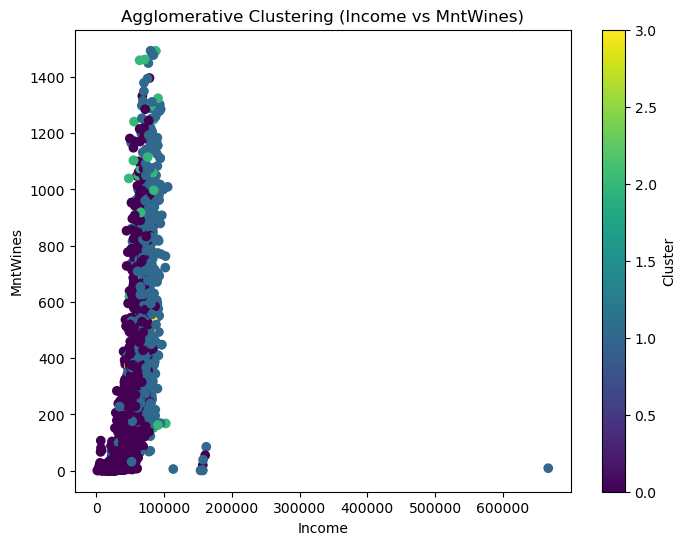

In [26]:
####Agg
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
# Step 1: Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)  # Adjust the number of clusters if needed
data['Agglo_Cluster'] = agg_clustering.fit_predict(data_scaled[numerical_cols])

# Step 2: Plot the clusters using two features (e.g., 'Income' and 'MntWines')
plt.figure(figsize=(8, 6))
plt.scatter(data['Income'], data['MntWines'], c=data['Agglo_Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering (Income vs MntWines)')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.colorbar(label='Cluster')
plt.show()

Income      24
MntWines     0
dtype: int64


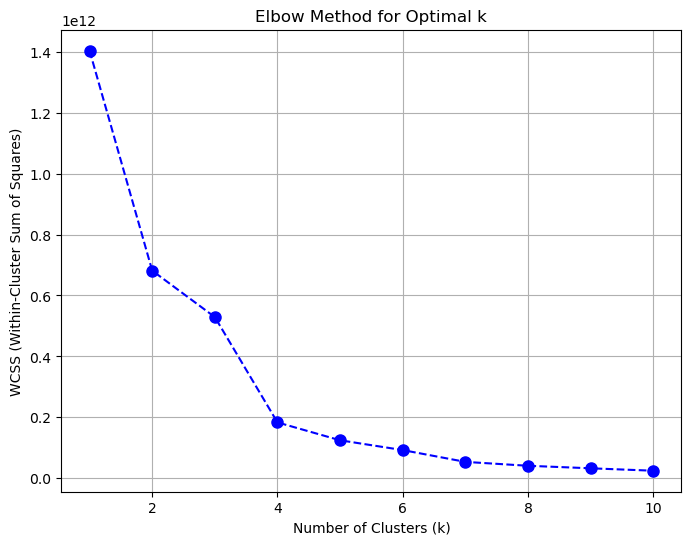

Cluster Centers:
[[4.48301452e+04 1.48215054e+02]
 [8.32900192e+04 6.76073718e+02]
 [6.66666000e+05 9.00000000e+00]
 [1.90718889e+04 1.10370370e+01]
 [6.90126538e+04 5.79763098e+02]
 [1.58024286e+05 2.90000000e+01]
 [5.63376294e+04 3.47181592e+02]
 [3.31899657e+04 3.99771167e+01]]


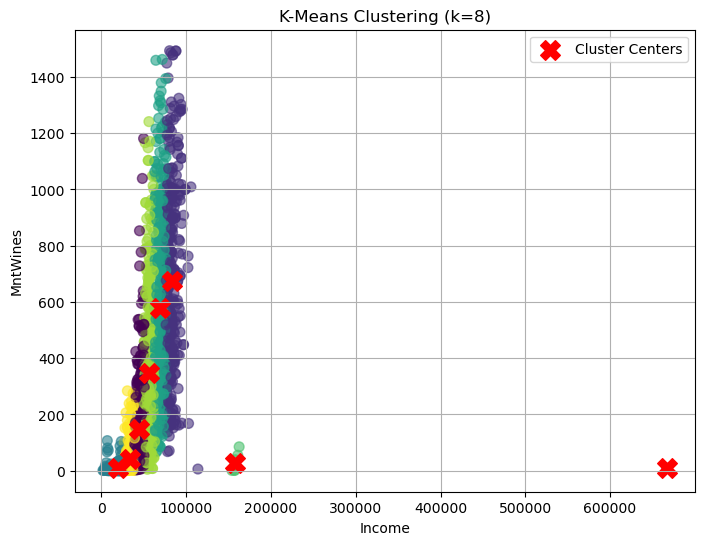

In [28]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load the dataset (replace with your actual path)
data = pd.read_csv('marketing_campaign1.csv')

# Step 1: Select the features for clustering (including 'Income' and other features)
X = data[['Income', 'MntWines']]  # Replace or add other features you need to use for clustering

# Step 2: Check for missing values in 'Income'
print(X.isnull().sum())  # Check for NaNs in 'Income' and other columns

# Step 3: Handle missing values in 'Income' (Imputation)
# We'll use SimpleImputer to replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or other strategies
X_imputed = imputer.fit_transform(X)  # Apply imputation to handle missing values

# Step 4: Elbow Method to determine the optimal number of clusters (k)
wcss = []  # List to store within-cluster sum of squares for each k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_imputed)
    wcss.append(kmeans.inertia_)

# Step 5: Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Step 6: Select the optimal k based on the elbow plot (adjust this value based on your plot)
optimal_k = 8  # Change this based on where the elbow is in the plot

# Step 7: Perform K-Means clustering with the chosen optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_imputed)
data['Cluster'] = kmeans.labels_  # Add the cluster labels to the dataframe

# Step 8: Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Step 9: Visualize the clusters and the cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(data['Income'], data['MntWines'], c=data['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Cluster Centers')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.grid(True)
plt.legend()
plt.show()

# Step 10: Save the clustered data (optional)
data.to_csv('clustered_data.csv', index=False)  # Save the clustered data to a CSV file
